# Denoising with Autoencoders

In [1]:
!git clone https://github.com/AkshaysNimbalkar/DataLit.git
  

Cloning into 'DataLit'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (115/115), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 383 (delta 9), reused 87 (delta 1), pack-reused 268
Receiving objects: 100% (383/383), 38.79 MiB | 18.51 MiB/s, done.
Resolving deltas: 100% (32/32), done.


# Loading Data in to Workspace

In [0]:
input_dir = '/content/DataLit/Week-8'
train = input_dir +'/train'
train_cleaned = input_dir + '/train_cleaned'
test = input_dir + '/test'

In [4]:
import os

train_images = sorted(os.listdir(train))
train_labels = sorted(os.listdir(train_cleaned))
test_images = sorted(os.listdir(test))

print("Total number of images in the training set: ", len(train_images))
print("Total number of cleaned images found: ", len(train_labels))
print("Total number of samples in the test set: ", len(test_images))

Total number of images in the training set:  144
Total number of cleaned images found:  144
Total number of samples in the test set:  72


# To Visualize Data From Model Training

In [11]:
samples =[train+'/'+train_images[0],train+'/'+train_images[1],train_cleaned+'/'+train_labels[0],train_cleaned+'/'+train_labels[1]]
samples

['/content/DataLit/Week-8/train/101.png',
 '/content/DataLit/Week-8/train/102.png',
 '/content/DataLit/Week-8/train_cleaned/101.png',
 '/content/DataLit/Week-8/train_cleaned/102.png']

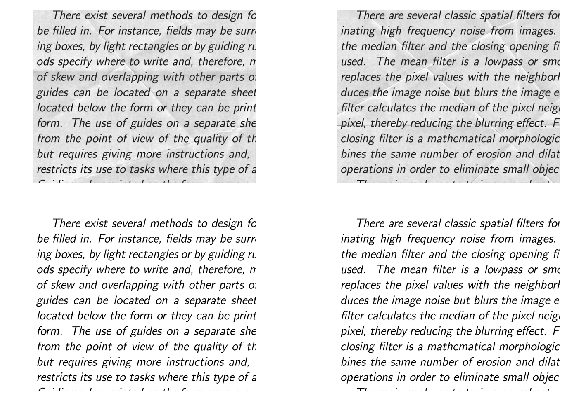

In [12]:

import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave

s1='/'

f, ax = plt.subplots(2, 2, figsize=(10,7))
for i, img in enumerate(samples):
    img = imread(img)
    ax[i//2, i%2].imshow(img, cmap='gray')
    ax[i//2, i%2].axis('off')
    

plt.show()

# Preparation Of Autoencoder Modedl

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Input
from keras.optimizers import SGD, Adam, Adadelta, Adagrad

# This is structure of autoecoder and can be noticed bottleneck in middle

def build_autoenocder():
  input_img = Input(shape=(420,540,1), name='image_input')
  
  #encoder 
  #"SAME" = with zero padding
  x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
  x = MaxPooling2D((2,2), padding='same', name='pool1')(x)
  x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv2')(x)
  x = MaxPooling2D((2,2), padding='same', name='pool2')(x)
  
  
  #decoder
  x = Conv2D(64, (3,3), activation='relu', padding='same', name='Conv3')(x)
  x = UpSampling2D((2,2), name='upsample1')(x)
  x = Conv2D(32, (3,3), activation='relu', padding='same', name='Conv4')(x)
  x = UpSampling2D((2,2), name='upsample2')(x)
  x = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(x)
  
  
  #model
  autoencoder = Model(inputs=input_img, outputs=x)
  autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
  return autoencoder

In [33]:
autoencoder = build_autoenocder()
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_input (InputLayer)     (None, 420, 540, 1)       0         
_________________________________________________________________
Conv1 (Conv2D)               (None, 420, 540, 32)      320       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 210, 270, 32)      0         
_________________________________________________________________
Conv2 (Conv2D)               (None, 210, 270, 64)      18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 105, 135, 64)      0         
_________________________________________________________________
Conv3 (Conv2D)               (None, 105, 135, 64)      36928     
_________________________________________________________________
upsample1 (UpSampling2D)     (None, 210, 270, 64)      0   

# Creating Train and Test DataSet

In [34]:
import numpy as np
from keras.preprocessing.image import load_img, array_to_img, img_to_array
X = []
Y = []

for img in train_images:
    img = load_img(train+'/'+img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    X.append(img)

for img in train_labels:
    img = load_img(train_cleaned+'/'+img, grayscale=True,target_size=(420,540))
    img = img_to_array(img).astype('float32')/255.
    Y.append(img)


X = np.array(X)
Y = np.array(Y)

print("Size of X : ", X.shape)
print("Size of Y : ", Y.shape)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


Size of X :  (144, 420, 540, 1)
Size of Y :  (144, 420, 540, 1)


In [35]:

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.1, random_state=111)
print("Total number of training samples: ", X_train.shape)
print("Total number of validation samples: ", X_valid.shape)

Total number of training samples:  (129, 420, 540, 1)
Total number of validation samples:  (15, 420, 540, 1)


# Train Model

In [37]:
autoencoder.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_valid, y_valid))

Train on 129 samples, validate on 15 samples
Epoch 1/10
129/129 [==============================] - 140s 1s/step - loss: 0.4202 - val_loss: 0.3494
Epoch 2/10
129/129 [==============================] - 141s 1s/step - loss: 0.3295 - val_loss: 0.2991
Epoch 3/10
129/129 [==============================] - 133s 1s/step - loss: 0.2620 - val_loss: 0.2438
Epoch 4/10
129/129 [==============================] - 141s 1s/step - loss: 0.2295 - val_loss: 0.2248
Epoch 5/10
129/129 [==============================] - 140s 1s/step - loss: 0.2090 - val_loss: 0.2110
Epoch 6/10
129/129 [==============================] - 126s 974ms/step - loss: 0.1945 - val_loss: 0.1994
Epoch 7/10
129/129 [==============================] - 125s 973ms/step - loss: 0.1844 - val_loss: 0.1902
Epoch 8/10
129/129 [==============================] - 124s 965ms/step - loss: 0.1760 - val_loss: 0.1851
Epoch 9/10
129/129 [==============================] - 130s 1s/step - loss: 0.1702 - val_loss: 0.1821
Epoch 10/10
129/129 [================

# Model Tesing using Test Data

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


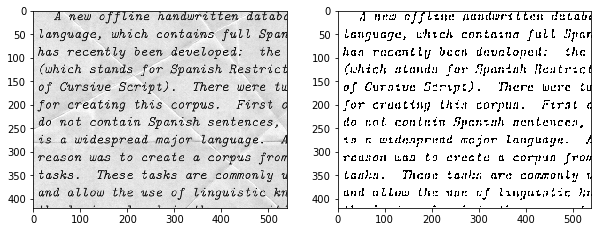

In [38]:
# Let's test our model on a sample test image
sample_test = load_img(test+'/'+test_images[10], grayscale=True, target_size=(420,540))
sample_test = img_to_array(sample_test)
sample_test_img = sample_test.astype('float32')/255.
sample_test_img = np.expand_dims(sample_test, axis=0)


# Get the predition
predicted_label = np.squeeze(autoencoder.predict(sample_test_img))

f, ax = plt.subplots(1,2, figsize=(10,8))
ax[0].imshow(np.squeeze(sample_test), cmap='gray')
ax[1].imshow(np.squeeze(predicted_label.astype('int8')), cmap='gray')
plt.show()